# Intro to linear regression
In this tutorial, we will solve a simple linear regression problem:
$$y = Wx + b + \text{noise}$$
Input data: $x_{i}, y_{i}$ for $i=1...N$

Our goal is to figure out the approximate value of W and b, represented by $\hat{W}$ and $\hat{b}$ by minimizing $\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})^2$, where $\hat{y}_{i}=\hat{W}x_{i}+\hat{b}$

In [1]:
# import tensorflow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Create input data using numpy. $$y = 0.1x + 0.3 + noise$$

In [2]:
# input 
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x))
y_ = 0.1 * x + 0.3 + noise

# uncomment the following line to plot input data
# plt.plot(x, y, '.')

In [19]:
# inference graph
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
y = W * x + b

# uncomment the following lines to see W and b
# print(W)
# print(b)

In [21]:
# training graph
loss = tf.reduce_mean(tf.square(y - y_)) # create an operation that calculate loss
optimizer = tf.train.GradientDescentOptimizer(0.05) # create an optimizer
train = optimizer.minimize(loss) # create an operation that minimizes loss

# uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)
# print(init)

In [22]:
# # uncomment the following line to see what we have built
# print(tf.get_default_graph().as_graph_def())

In [23]:
# create a session and launch the graph
sess = tf.Session()
init = tf.global_variables_initializer() # create an operation initializes all the variables
sess.run(init)
y_init = sess.run(y)

# uncomment the follwing line to see the initial W and b values
# sess.run([W, b])

In [24]:
# perform training
losses = list()
for step in range(1000):
    _, loss_ = sess.run([train, loss])
    losses.append(loss_)
    # uncomment the following lines to watch training happen real time
    # if step % 100 == 0:
    #    print(step, sess.run([W, b]))
print(sess.run([W, b]))

[array([ 0.10165726], dtype=float32), array([ 0.30016717], dtype=float32)]


In [25]:
# uncomment the following lines to show loss decline curve
# plt.plot(losses)
# plt.xlabel('step')
# plt.ylabel('loss')

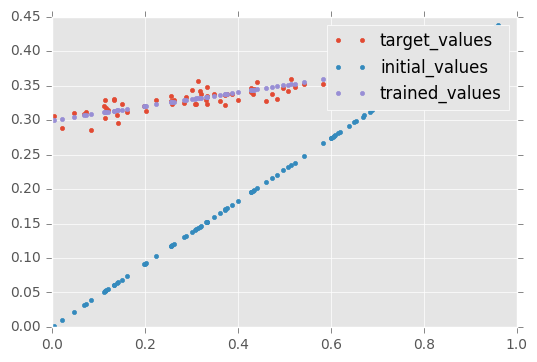

In [26]:
# uncomment the following lines to compare
plt.plot(x, y_, '.', label='target_values')
plt.plot(x, y_init, '.', label='initial_values')
plt.plot(x, sess.run(y), '.', label='trained_values')
plt.legend()

Back to [0_tf_hello_world.ipynb](0_tf_hello_world.ipynb)

Next to [2_mnist_softmax.ipynb](2_mnist_softmax.ipynb)